In [3]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Load the cleaned dataset from Day 2
df = pd.read_csv('/content/drive/MyDrive/DataSet/cleaned_DataScientist.csv')

# Confirm Job Title column
print(df['Job Title'].head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0                senior data scientist
1    data scientist, product analytics
2                 data science manager
3                         data analyst
4               director, data science
Name: Job Title, dtype: object


In [4]:
# Step 1: Simplify and group job titles

def simplify_title(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'data scientist'
    elif 'data analyst' in title:
        return 'data analyst'
    elif 'ml' in title or 'machine learning' in title:
        return 'ml engineer'
    elif 'research' in title:
        return 'research scientist'
    elif 'ai' in title:
        return 'ai scientist'
    elif 'engineer' in title:
        return 'data engineer'
    elif 'manager' in title:
        return 'data manager'
    elif 'director' in title:
        return 'director'
    elif 'business analyst' in title:
        return 'business analyst'
    elif 'analytics' in title:
        return 'analytics specialist'
    else:
        return 'other'

# Apply the function to a new column
df['Simplified Title'] = df['Job Title'].apply(simplify_title)

# Check the new simplified column
df[['Job Title', 'Simplified Title']].head(10)


,Job Title,Simplified Title
0,senior data scientist,data scientist
1,"data scientist, product analytics",data scientist
2,data science manager,data manager
3,data analyst,data analyst
4,"director, data science",director
5,data scientist,data scientist
6,data scientist,data scientist
7,data scientist/machine learning,data scientist
8,"data scientist, acorn ai labs",data scientist
9,data scientist,data scientist


In [5]:
# Step 2: Count frequency of simplified job titles
top_titles = df['Simplified Title'].value_counts().head(10)

# Display result
print("Top 10 Job Titles:")
print(top_titles)


Top 10 Job Titles:
Simplified Title
data scientist          984
data analyst            748
data engineer           748
other                   190
ml engineer              39
data manager             35
analytics specialist     30
director                 24
ai scientist             13
research scientist       10
Name: count, dtype: int64


/tmp/ipython-input-4039254787.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')


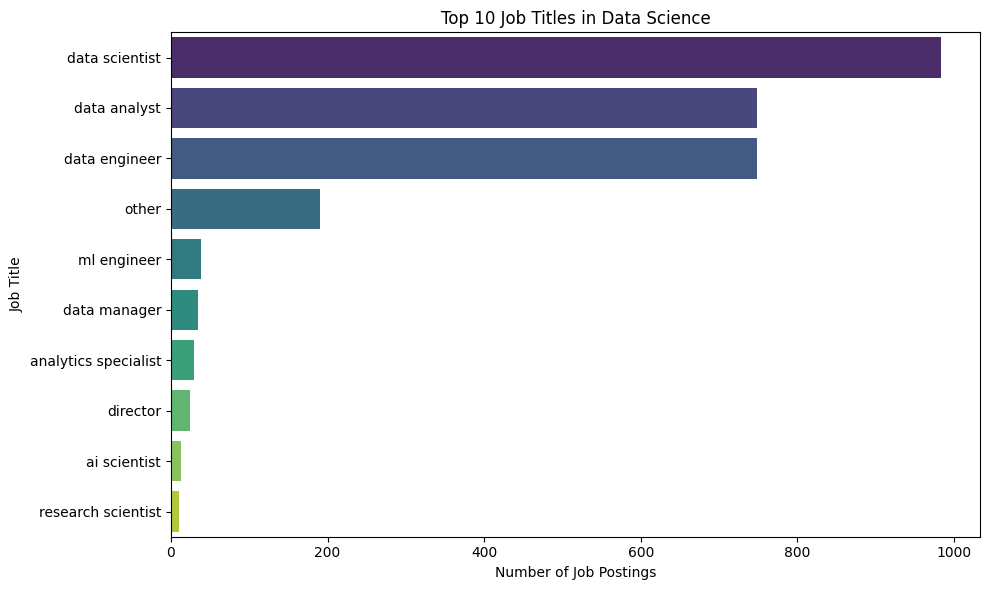

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Visualize the top job titles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')
plt.title('Top 10 Job Titles in Data Science')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


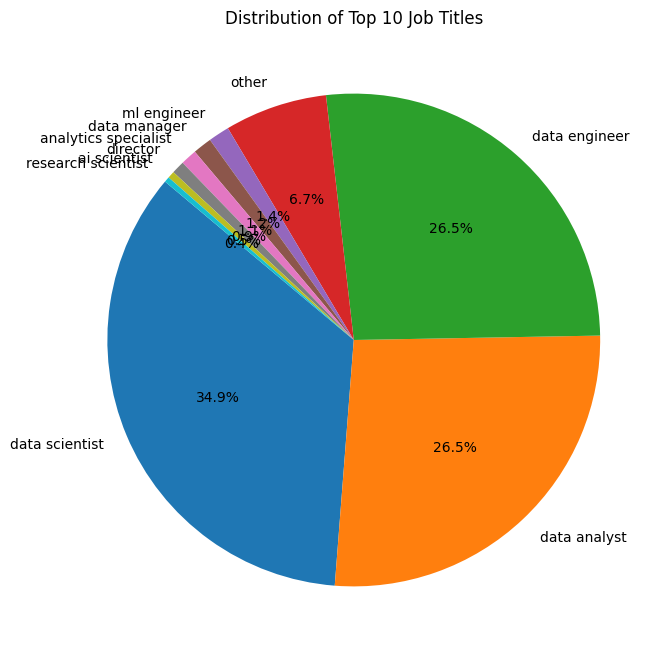

In [10]:
top_titles.plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=140)
plt.title('Distribution of Top 10 Job Titles')
plt.ylabel('')
plt.show()

## Day 3: Job Title Analysis & Visualization

**Dataset Used:** `cleaned_DataScientist.csv`

---

### Objective:
To analyze the most in-demand job titles in the dataset by grouping similar roles and visualizing their distribution.

---

### Steps Performed:

1. **Loaded Cleaned Dataset**  
   Pulled the cleaned Day 2 CSV file from Google Drive using `pandas`.

2. **Grouped Similar Job Titles**  
   Used keyword-based string matching to group variations like:
   - "senior data scientist", "data scientist – product" → `data scientist`
   - "machine learning engineer", "ml developer" → `ml engineer`
   - "director, data science" → `director`
   - Others grouped under broader categories like `data analyst`, `data engineer`, `other`, etc.

3. **Created `Simplified Title` Column**  
   Added a new column to the dataset for grouped role types.

4. **Counted Frequency of Job Titles**  
   Identified the top 10 job roles by volume of postings.

5. **Visualized the Results**  
   - Created a **bar chart** to show top 10 job titles clearly
   - Created a **pie chart** (with sorted segments) for an alternate view

---

### 📊 Key Findings:
- **Top 3 Roles:**
  - `data scientist` (34.9%)
  - `data analyst` (26.5%)
  - `data engineer` (26.5%)
- Specialized roles like `ml engineer`, `ai scientist`, and `analytics specialist` are present but less frequent

---